## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x=np.linspace(0,20)

In [3]:
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [4]:
a= -2
b= 1

y=a*x+b

#### Plot your data points. 

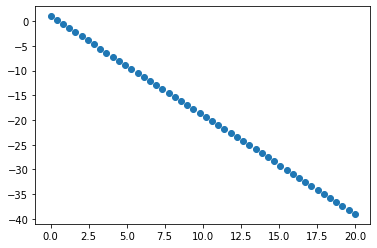

In [5]:
plt.scatter(x,y);

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
def J(x,y,theta_0,theta_1):
    m=len(x)
    cost = (1/(2*m) *((theta_0 + (theta_1 *x )) - y)**2).sum()
    return cost

In [7]:
J(x,y, 0,0)

249.88775510204084

In [8]:
def gradiant(x,y,r,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        #update thetas
        theta_0 = theta_0 - r*grad_0
        theta_1 = theta_1 - r*grad_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list
        

In [9]:
r=0.001
iterations=100

In [10]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = gradiant(x,y,r,iterations)

In [11]:
y_pred =theta_0+ theta_1*x

In [12]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9976443888155676

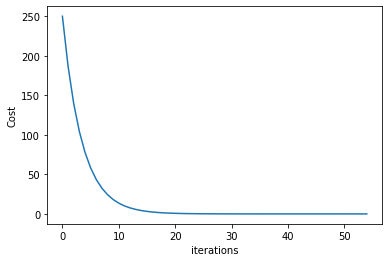

In [13]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');


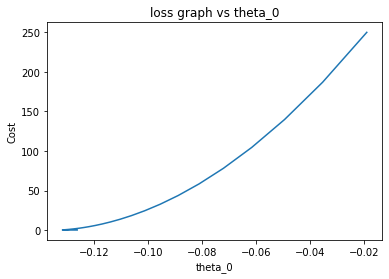

In [14]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

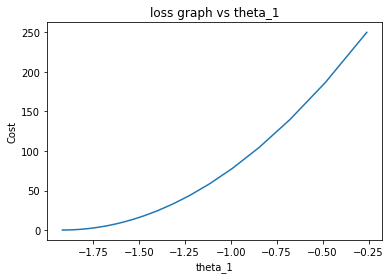

In [15]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

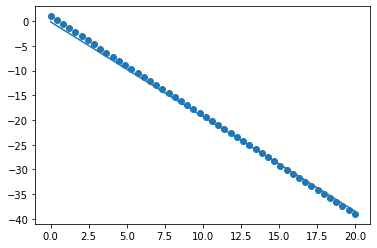

In [16]:
plt.scatter(x,y)
plt.plot(x,y_pred);

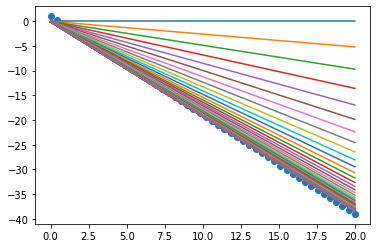

In [17]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

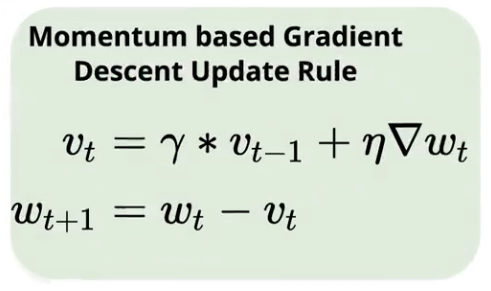

#### γ takes values between 0 and 1.
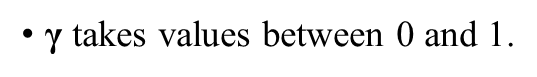

In [18]:
def gradiant_momentum(x, y, r, gamma ,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    prev_v_theta_0 = 0
    prev_v_theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        v_theta_0 = gamma * prev_v_theta_0 + r*grad_0
        v_theta_1 = gamma * prev_v_theta_1 + r*grad_1
        
        prev_v_theta_0 = v_theta_0
        prev_v_theta_1 = v_theta_1
        
        #update thetas
        theta_0 = theta_0 - v_theta_0
        theta_1 = theta_1 - v_theta_1
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list

In [19]:
gamma = 0.001
r = 0.01
iterations = 5

In [20]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = gradiant_momentum(x,y,r,gamma,iterations)

In [21]:
y_pred =theta_0+ theta_1*x

In [22]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9975358467277979

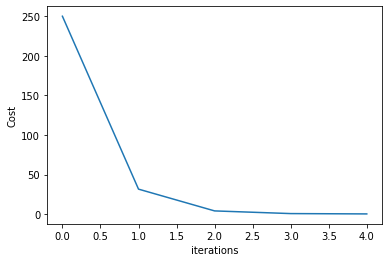

In [23]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

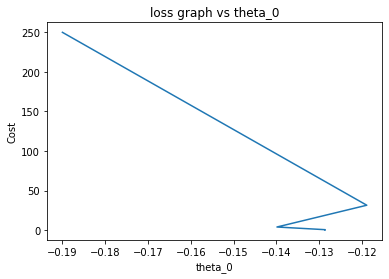

In [24]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

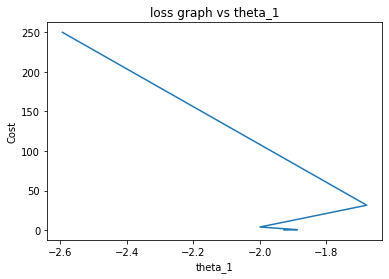

In [25]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

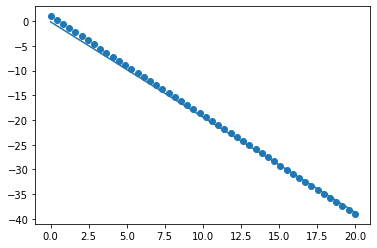

In [26]:
plt.scatter(x,y)
plt.plot(x,y_pred);

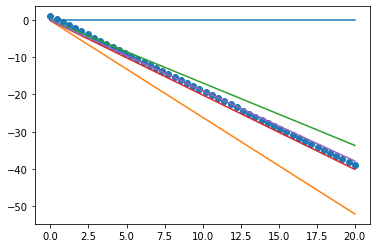

In [27]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [28]:
gamma = 0
r = 0.01
iterations =4

In [29]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = gradiant_momentum(x,y,r,gamma,iterations)

In [30]:
y_pred =theta_0+ theta_1*x

In [31]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.996731525280375

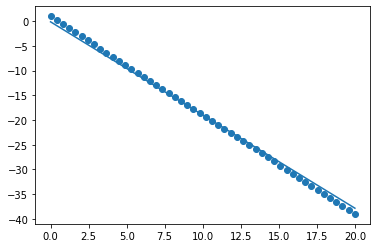

In [32]:
plt.scatter(x,y)
plt.plot(x,y_pred);

In [33]:
gamma = 0.99
r = 0.01
iterations =4

In [34]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = gradiant_momentum(x,y,r,gamma,iterations)

In [35]:
y_pred =theta_0+ theta_1*x

In [36]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

-2.1493210297924534

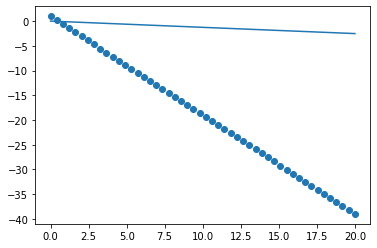

In [37]:
plt.scatter(x,y)
plt.plot(x,y_pred);

### Update your Batch GD for one variable  implementation to be NAG and check your results

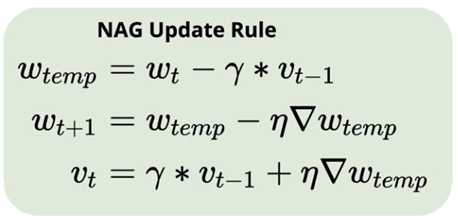

In [38]:
def gradiant_NAG(x,y,r,gamma,iterations):
    
    cost_list = []
    
    theta_0_list = []
    theta_1_list = []
    
    grad_0_list = []
    grad_1_list = []
    
    hypothesis_list=[]
    
    #theta intilization
    theta_0 = 0
    theta_1 = 0
    
    prev_v_theta_0 = 0
    prev_v_theta_1 = 0
    
    m = len(y)
    for i in range (iterations):
        
        #hypothesis
        h = theta_0 + (theta_1 * x)
        hypothesis_list.append(h)
        
        #get cost
        cost = J(x, y, theta_0 , theta_1)
        cost_list.append(cost)
        
        # caluulate gradiant
        grad_0 = (( h - y ).sum())/m
        grad_1= ((( h - y )* x) .sum())/m
        
        grad_0_list.append(theta_0)
        grad_1_list.append(theta_1)
        
        #v_theta_0 = gamma * prev_v_theta_0 
        #v_theta_1 = gamma * prev_v_theta_1 
        
        #prev_v_theta_0 = v_theta_0
        #prev_v_theta_1 = v_theta_0
        
        #Equation 1
        theta_temp0 = theta_0 - prev_v_theta_0
        theta_temp1 = theta_1 - prev_v_theta_1
        
        grad_temp_0 = (( (theta_temp0 + (theta_temp1 * x)) - y ).sum())/m
        grad_temp_1= ((( (theta_temp0 + (theta_temp1 * x)) - y )* x) .sum())/m
        
        #update thetas  
        #Equation 2
        theta_0 = theta_temp0 - r*grad_temp_0
        theta_1 = theta_temp1 - r*grad_temp_0
        
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        
        # Equation 3
        v_theta_0 = gamma*prev_v_theta_0 + r*grad_temp_0
        v_theta_0 = gamma*prev_v_theta_1 + r*grad_temp_1
        
        prev_v_theta_0 = v_theta_0
        prev_v_theta_1 = v_theta_0
        
        #if ther's no change in the cost so break
        if i > 1:
            if abs(cost_list[i-1]- cost_list[i])<0.0001:
                break

            #if ther's no change in gradiant so, break
            if abs(np.linalg.norm([theta_0_list[i],theta_1_list[i]])-np.linalg.norm([theta_0_list[i-1],theta_1_list[i-1]]))< 0.0001:
                break

            #if no chane in thetas so break
            if abs(np.linalg.norm([grad_0_list[i],grad_1_list[i]])-np.linalg.norm([grad_0_list[i-1],grad_1_list[i-1]])) < 0.0001:
                break
    
    return theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list
        

In [39]:
gamma = 0.001
r = 0.01
iterations = 5

In [40]:
theta_0 , theta_1, cost_list, theta_0_list, theta_1_list, hypothesis_list = gradiant_momentum(x,y,r,gamma,iterations)

In [41]:
y_pred =theta_0+ theta_1*x

In [42]:
SSot= ((y - y_pred )**2).sum()
SSret= ((y-y.mean())**2).sum()

r2=1-(SSot/SSret)
r2

0.9975358467277979

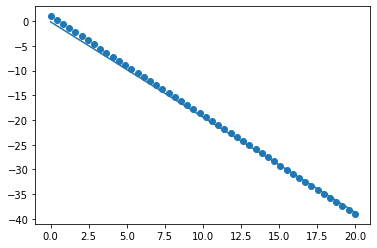

In [43]:
plt.scatter(x,y)
plt.plot(x,y_pred);

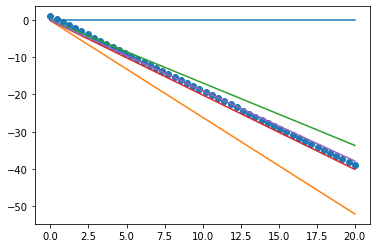

In [44]:
plt.scatter(x,y)
for i in np.array(hypothesis_list):
    plt.plot(x,i)

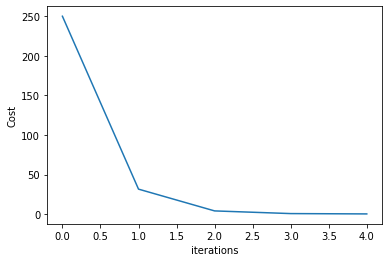

In [45]:
plt.plot(cost_list)
plt.xlabel('iterations')
plt.ylabel('Cost');

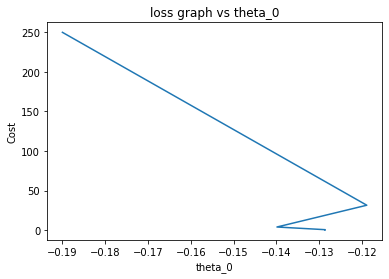

In [46]:
plt.plot(theta_0_list, cost_list)
plt.title('loss graph vs theta_0')
plt.xlabel('theta_0')
plt.ylabel('Cost');

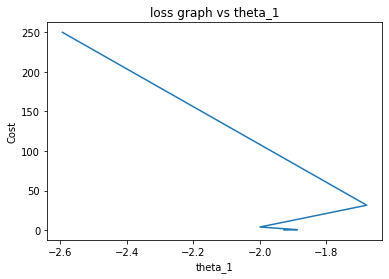

In [47]:
plt.plot(theta_1_list, cost_list)
plt.title('loss graph vs theta_1')
plt.xlabel('theta_1')
plt.ylabel('Cost');

## Congratulations 
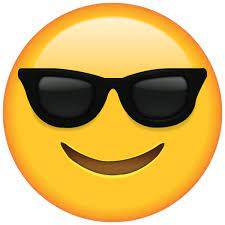